In [ ]:
pip install -e .

In [ ]:
from ift6758.data import get_player_stats
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import matplotlib.pyplot as plt

In [ ]:
df = get_player_stats(2018, 'goalies')

In [ ]:
df.columns

In [150]:
player_stat = df.apply(pd.to_numeric, errors='ignore').sort_values(by='W', ascending=False)#[['SA','SV','Player','SV%']]

def highlight_columns(df, rows=20, color='lightgreen', columns_to_shadow=[], columns_to_show=[]):
    highlight = lambda slice_of_df: 'background-color: %s' % color
    sample_df = df.head(rows)
    if len(columns_to_show) != 0:
        sample_df = sample_df[columns_to_show]
    highlighted_df = sample_df.style.applymap(highlight, subset=pd.IndexSlice[:, columns_to_shadow])
    return highlighted_df

highlight_columns(player_stat, rows=95, color='lightblue',columns_to_shadow=['SV%','W'])
#player_stat

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
38,40,Connor Hellebuyck,24,WPG,67,64,44,11,9,156,2048,1892,0.924000,2.360000,6,14.000000,3966,39,0.609000,6,87.000000,23.750000,0,2,2,0
85,92,Andrei Vasilevskiy,23,TBL,65,64,44,17,3,167,2075,1908,0.920000,2.620000,8,13.200000,3825,36,0.563000,8,92.000000,15.120000,0,2,2,14
73,80,Pekka Rinne,35,NSH,59,59,42,13,4,134,1840,1706,0.927000,2.310000,8,13.200000,3475,40,0.678000,5,83.000000,27.490000,0,1,1,6
1,2,Frederik Andersen,28,TOR,66,66,38,21,5,182,2211,2029,0.918000,2.810000,5,13.600000,3889,37,0.561000,8,94.000000,12.060000,0,1,1,2
8,9,Sergei Bobrovsky,29,CBJ,65,65,37,22,6,158,1993,1835,0.921000,2.420000,5,12.900000,3912,38,0.585000,10,90.000000,16.920000,0,3,3,0
22,24,Devan Dubnyk,31,MIN,60,59,35,16,7,145,1769,1624,0.918000,2.520000,5,11.000000,3450,36,0.610000,8,93.000000,10.260000,0,3,3,12
40,42,Braden Holtby,28,WSH,54,54,34,16,4,153,1648,1495,0.907000,2.990000,0,8.300000,3068,30,0.556000,9,106.000000,-8.360000,0,0,0,2
71,78,Tuukka Rask,30,BOS,54,53,34,14,5,125,1513,1388,0.917000,2.360000,3,9.300000,3173,30,0.566000,6,94.000000,7.790000,0,2,2,4
69,76,Jonathan Quick,32,LAK,64,63,33,28,3,147,1867,1720,0.921000,2.400000,5,12.200000,3677,37,0.587000,7,90.000000,16.860000,0,4,4,10
81,88,Cam Talbot,30,EDM,67,67,31,31,3,188,2036,1848,0.908000,3.020000,1,10.300000,3730,32,0.478000,11,105.000000,-9.300000,0,1,1,8


In [ ]:
player_stat_reduit = player_stat.sort_values(by=['W','SV%'], ascending=False)[['Player','W','SV%']]
player_stat_reduit

In [ ]:
pd_player = player_stat_reduit.astype(str)['Player']
pd_player[:20]

In [ ]:
pd_SV = player_stat_reduit['SV%']

In [ ]:
pd_SV[:20]

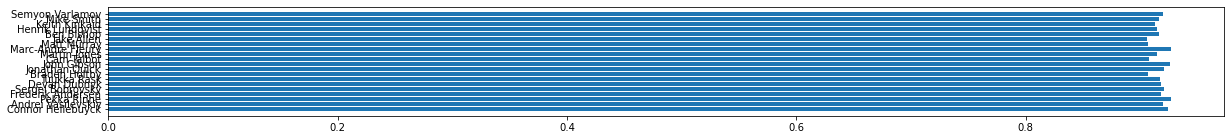

In [151]:
plt.barh(pd_player[:20],pd_SV[:20])
plt.rcParams['figure.figsize'] = [10, 2]
#plt.figure(figsize=(50, 30))
plt.show()